In [1]:
#Takehome midterm exam
#author: Nilava Metya
#netid: nm1137
#course: Data Mining

# Problem
Define the dissimilarity between two observations, $x_i$ and $x_i'$ , with $p-$dimensional attributes/inputs/features
as the following: $$D(x_{i},x_{i'}) = \sum_{j=1}^p w_jd_j\left(x_{ij},x_{i'j}\right)$$ where the weights $w_j$ satisfy $\sum_{j=1}^p w_j=1$ and $d_j\left(x_i,x_{i'}\right) = \left(x_{ij}-x_{i'j}\right)^2$ is the squared error distance. Assume there are n observations. How to specify the weights wj so that each attribute has equal influence? Please explain your reasons and provide detailed derivations.

\subsection*{Solution}
The (relative) influence of an attribute is determined by its contribution to the average dissimiliarity. The average dissimilarity is given by $$\overline D = \frac{1}{n^2}\sum_{1\leq i,i'\leq n} D(x_i,x_{i'}) = \frac{1}{n^2}\sum_{1\leq i,i'\leq n}\sum_{j=1}^p w_jd_j\left(x_{ij},x_{i'j}\right) = \sum_{j=1}^p w_j \left(\frac{1}{n^2}\sum_{1\leq i,i'\leq n}d_j\left(x_{ij},x_{i'j}\right)\right) = \sum_{j=1}^p w_j\overline{d_j}$$ where $\displaystyle \overline{d_j} = \frac{1}{n^2}\sum_{1\leq i,i'\leq n}d_j\left(x_{ij},x_{i'j}\right)$. So the influence of the $j^{\text{th}}$ variable is given by $w_j\overline{d_j}$. To have equal influence means to have all $w_j\overline{d_j}$ equal. So we simply choose $\displaystyle w_j = \frac{1/\overline{d_j}}{\sum_{i=1}^p \frac{1}{\overline{d_i}}}$. The denominator is simply a normalizing factor to make $\sum_{j=1}^p w_j=1$. 

Now we compute $\overline{d_j}$ in our case. Clearly $\displaystyle \overline{d_j} = \frac{1}{n^2}\sum_{1\leq i,i'\leq n}d_j\left(x_{ij},x_{i'j}\right) = \frac{1}{n^2}\sum_{1\leq i,i'\leq n} \left(x_{ij}-x_{i'j}\right)^2$. Now note that $\frac{1}{n^2}\sum_{1\leq i,i'\leq n} \left(X_{i}-X_{i'}\right)^2 = \frac{1}{n^2}\sum_{i,i'}X_i^2 + \frac{1}{n^2}\sum_{i,i'}X_{i'}^2 - \frac{1}{n^2}\sum_{i,i'}2X_iX_{i'} = 2\left[\frac{1}{n}\sum_i X_i^2 - \left(\frac{1}{n}\sum_iX_i\right)^2\right] = 2 (E(X^2) - E(X)^2) = 2\sigma_X^2$ where $\sigma_X$ is the standard deviation. Thus it stands that $\overline{d_j} = 2\sigma_j^2$ where $\sigma_j$ is the standard deviation of the $j^{\text{th}}$ attribute. Therefore we want the weights to be $\displaystyle w_j = \frac{\sigma_j^{-2}}{\sum_{i=1}^p \frac{1}{\sigma_i^2}}$.

\newpage
# Problem
Download the Iris data (you can use data(iris) in \texttt{R}).
\begin{enumerate}
\item The output is “species” which has three values and there are in total $150$ observations. The objective
is to predict “species” using the four covariates. Please compare the performance of the following
three commonly used classifies: (a) LDA, (b) logistic regression, (c) nearest neighbors. Summarize
your results.
\item Remove the output “species” from the data and apply the $k-$means clustering. Compare the clustering
results to the true group defined by species and summarize the results.
\item If the number of species is unknown in (2), can you recommend a method to estimate it. Describe
the idea and the algorithm (not necessary to produce results).
\item {[Bonus]} Compare the performance of (2) with another clustering method.
\end{enumerate}

\subsection*{Solution}
Let's import the data and divide it into training and testing data. The data comprises $150$ observations, out of which we take $90$ of those to be training data and the other $60$ to be testing data.

In [2]:
set.seed(-459091842)
data = iris #importing data

#pick some training data
train_rows = sample(nrow(data), replace = FALSE, 90)
ir.train = data[train_rows,]
x.train = ir.train[,c(1:4)]
y.train = ir.train[,c(5)]

#the rest are testing data
ir.test = data[-train_rows,]
x.test = ir.test[,c(1:4)]
y.test = ir.test[,c(5)]

Let's start with **Linear Discriminant Analysis**. There are three \texttt{Species}: \texttt{setosa}, \texttt{versicolor} and \texttt{virginica}.

In [3]:
library(MASS) #needed for LDA
ir.lda = lda(Species ~ Petal.Width + Petal.Length + Sepal.Width + Sepal.Length, data = ir.train) #fitting model
ir.lda

Call:
lda(Species ~ Petal.Width + Petal.Length + Sepal.Width + Sepal.Length, 
    data = ir.train)

Prior probabilities of groups:
    setosa versicolor  virginica 
 0.3555556  0.3111111  0.3333333 

Group means:
           Petal.Width Petal.Length Sepal.Width Sepal.Length
setosa        0.253125     1.443750    3.409375     5.003125
versicolor    1.364286     4.335714    2.814286     6.053571
virginica     2.103333     5.600000    2.993333     6.673333

Coefficients of linear discriminants:
                    LD1        LD2
Petal.Width  -2.9638172 -3.9018805
Petal.Length -2.0092156  1.7192566
Sepal.Width   1.4715672 -1.4279477
Sepal.Length  0.6446696 -0.4880036

Proportion of trace:
   LD1    LD2 
0.9914 0.0086 

Now that we have fit the LDA model, we do the predictions and find the testing and training error.

In [4]:
ir.lda.predict.test = predict(ir.lda, x.test) #predicting on testing data
ir.lda.error.test = mean(ir.lda.predict.test$class != y.test) #average dissimilarity
cat("testing error:", ir.lda.error.test*100, "%","\n")

ir.lda.predict.train = predict(ir.lda, x.train) #predicting on training data
ir.lda.error.train = mean(ir.lda.predict.train$class != y.train) #average dissimilarity
cat("training error:", ir.lda.error.train*100, "%") 

testing error: 3.333333 % 
training error: 2.222222 %

We do **Logistic Regression** now. There are three \texttt{Species}: \texttt{setosa}, \texttt{versicolor} and \texttt{virginica}. Since logistic regression only works for binary classification, we have to use a modified procedure. Luckily the \texttt{vglm()} function in the \texttt{VGAM} package handles this.

Before that, let's first reduce the number of covariates.

In [5]:
not_setosa = which(data[,c(5)] != "setosa") #looks at versicolor and virginica
ir_restricted = data[not_setosa,]
model.lr = glm(Species ~ Sepal.Width + Sepal.Length + Petal.Width + Petal.Length,data = ir_restricted, family = "binomial")
summary(model.lr)


Call:
glm(formula = Species ~ Sepal.Width + Sepal.Length + Petal.Width + 
    Petal.Length, family = "binomial", data = ir_restricted)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept)   -42.638     25.707  -1.659   0.0972 .
Sepal.Width    -6.681      4.480  -1.491   0.1359  
Sepal.Length   -2.465      2.394  -1.030   0.3032  
Petal.Width    18.286      9.743   1.877   0.0605 .
Petal.Length    9.429      4.737   1.991   0.0465 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 138.629  on 99  degrees of freedom
Residual deviance:  11.899  on 95  degrees of freedom
AIC: 21.899

Number of Fisher Scoring iterations: 10


There's no warning which means that that the data \texttt{versicolor} and \texttt{virginica} are not well-separated.

In [6]:
not_versicolor = which(data[,c(5)] != "versicolor") #looks at setosa and virginica
ir_restricted = data[not_versicolor,]
model.lr = glm(Species ~ Sepal.Width + Sepal.Length + Petal.Width + Petal.Length,data = ir_restricted, family = "binomial")
summary(model.lr)

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Species ~ Sepal.Width + Sepal.Length + Petal.Width + 
    Petal.Length, family = "binomial", data = ir_restricted)

Coefficients:
               Estimate Std. Error z value Pr(>|z|)
(Intercept)     -15.168 560540.412       0        1
Sepal.Width      -4.172  94374.304       0        1
Sepal.Length     -3.961 143416.970       0        1
Petal.Width       9.736 169967.550       0        1
Petal.Length     11.975  88570.514       0        1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1.3863e+02  on 99  degrees of freedom
Residual deviance: 8.5827e-10  on 95  degrees of freedom
AIC: 10

Number of Fisher Scoring iterations: 25


The warning message indicated that the data for \texttt{setosa} and \texttt{virginica} are not well-separated.

In [7]:
not_virginica = which(data[,c(5)] != "virginica") #looks at setosa and versicolor
ir_restricted = data[not_virginica,]
model.lr = glm(Species ~ Sepal.Width + Sepal.Length + Petal.Width + Petal.Length,data = ir_restricted, family = "binomial")
summary(model.lr)

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Species ~ Sepal.Width + Sepal.Length + Petal.Width + 
    Petal.Length, family = "binomial", data = ir_restricted)

Coefficients:
               Estimate Std. Error z value Pr(>|z|)
(Intercept)       6.556 601950.323       0        1
Sepal.Width      -7.418  92924.451       0        1
Sepal.Length     -9.879 194223.245       0        1
Petal.Width      25.033 216058.936       0        1
Petal.Length     19.054 144515.981       0        1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1.3863e+02  on 99  degrees of freedom
Residual deviance: 1.3166e-09  on 95  degrees of freedom
AIC: 10

Number of Fisher Scoring iterations: 25


The warning message indicated that the data for \texttt{setosa} and \texttt{versicolor} are not well-separated.

Looking at the summary for the logistic regression model fitted for \texttt{versicolor} vs \texttt{virginica}, we discard the coviriates \texttt{Sepal.Width} and \texttt{Sepal.Length} because they have the highest $P(>|z|)$ values.

Now we are ready to fit the model on training data based on these two covariates.

In [8]:
library(VGAM)
ir.lr = vglm(Species ~ Petal.Width + Petal.Length, data = ir.train, family = multinomial) #fitting model
summary(ir.lr)

Loading required package: stats4

Loading required package: splines

Warning message in checkwz(wz, M = M, trace = trace, wzepsilon = control$wzepsilon):
“1 diagonal elements of the working weights variable 'wz' have been replaced by 1.819e-12”
Warning message in checkwz(wz, M = M, trace = trace, wzepsilon = control$wzepsilon):
“7 diagonal elements of the working weights variable 'wz' have been replaced by 1.819e-12”
Warning message in checkwz(wz, M = M, trace = trace, wzepsilon = control$wzepsilon):
“13 diagonal elements of the working weights variable 'wz' have been replaced by 1.819e-12”
Warning message in checkwz(wz, M = M, trace = trace, wzepsilon = control$wzepsilon):
“20 diagonal elements of the working weights variable 'wz' have been replaced by 1.819e-12”
Warning message in checkwz(wz, M = M, trace = trace, wzepsilon = control$wzepsilon):
“24 diagonal elements of the working weights variable 'wz' have been replaced by 1.819e-12”
Warning message in checkwz(wz, M = M, trace = tr


Call:
vglm(formula = Species ~ Petal.Width + Petal.Length, family = multinomial, 
    data = ir.train)

Coefficients: 
                Estimate Std. Error z value Pr(>|z|)  
(Intercept):1    140.510  35177.106      NA       NA  
(Intercept):2     82.284     42.278   1.946   0.0516 .
Petal.Width:1    -19.555  89363.128   0.000   0.9998  
Petal.Width:2     -7.126      5.598      NA       NA  
Petal.Length:1   -33.341  37257.251  -0.001   0.9993  
Petal.Length:2   -14.302      7.772  -1.840   0.0657 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Names of linear predictors: log(mu[,1]/mu[,3]), log(mu[,2]/mu[,3])

Residual deviance: 9.2879 on 174 degrees of freedom

Log-likelihood: -4.6439 on 174 degrees of freedom

Number of Fisher scoring iterations: 22 

'(Intercept):1', 'Petal.Width:2'


Reference group is level  3  of the response

The warnings above mean that the classes are easily separated, which is why MLE doesn't exist.

In [9]:
colnames(ir.test)

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

First we note above that \texttt{Petal.Length} and \texttt{Petal.Width} correspond to columns $3$ and $4$ respectively. Now we are ready to predict using this model. 

In [10]:
ir.lr.predict.test = predict(ir.lr, ir.test[, c(3, 4)], type = "response") #getting predictions from testing data
cl = apply(ir.lr.predict.test, 1, which.max) #finding the maximum probability in each row on testing data
cl[cl == 1] = "setosa" #renaming all '1' to "setosa"
cl[cl == 2] = "versicolor" #renaming all '2' to "versicolor"
cl[cl == 3] = "virginica" #renaming all '2' to "virginica"
ir.lr.error.test = mean(y.test != data.frame(cl)[,c(1)]) #finding average dissimilarity
cat("testing error:", ir.lr.error.test*100, "%","\n")

ir.lr.predict.train = predict(ir.lr, ir.train[, c(3, 4)], type = "response") #getting predictions from training data
cl = apply(ir.lr.predict.train, 1, which.max) #finding the maximum probability in each row on training data
cl[cl == 1] = "setosa" #renaming all '1' to "setosa"
cl[cl == 2] = "versicolor" #renaming all '2' to "versicolor"
cl[cl == 3] = "virginica" #renaming all '2' to "virginica"
ir.lr.error.train = mean(y.train != data.frame(cl)[,c(1)])  #finding average dissimilarity
cat("training error:", ir.lr.error.train*100, "%")

testing error: 5 % 
training error: 3.333333 %

Now we come to $k$**-nearest neighbours**.

In [11]:
library(class)
k = c(1:20)
ir.knn.error.test = numeric(length(k)) #initializing vector for testing errors
ir.knn.error.train = numeric(length(k)) #initializing vector for training errors
for (i in k) {
  ir.knn.predict.test = knn(x.train, x.test, y.train, k[i]) #knn prediction from testing data
  ir.knn.predict.train = knn(x.train, x.train, y.train, k[i]) #knn prediction from training data
  ir.knn.error.test[i] = mean(ir.knn.predict.test != y.test)
  ir.knn.error.train[i] = mean(ir.knn.predict.train != y.train)
}
error = matrix(c(k, ir.knn.error.test*100, ir.knn.error.train*100), ncol = 3)
colnames(error) = c("k", "Test Error(%)", "Train Error(%)")
print(as.data.frame(error), row.names = F)

  k Test Error(%) Train Error(%)
  1      3.333333       0.000000
  2      3.333333       1.111111
  3      5.000000       3.333333
  4      5.000000       4.444444
  5      5.000000       3.333333
  6      6.666667       3.333333
  7      6.666667       2.222222
  8      8.333333       2.222222
  9      8.333333       1.111111
 10      5.000000       2.222222
 11      5.000000       2.222222
 12      6.666667       3.333333
 13      8.333333       4.444444
 14      8.333333       4.444444
 15      8.333333       4.444444
 16      8.333333       3.333333
 17      6.666667       4.444444
 18      6.666667       4.444444
 19      8.333333       4.444444
 20      8.333333       4.444444


Let's summarize the training and testing errors. 

In [12]:
error = matrix(c(ir.lda.error.test*100, ir.lr.error.test*100, ir.knn.error.test*100, ir.lda.error.train*100, ir.lr.error.train*100, ir.knn.error.train*100), ncol = 2) #summary matrix showing testing and training error rates for the various methods
colnames(error) = c("Test Error(%)", "Train Error(%)")
rownames(error) = c("Linear Discriminant Analysis", "Logistic Regression", paste("k-NN with k =", k))
print(error)

                             Test Error(%) Train Error(%)
Linear Discriminant Analysis      3.333333       2.222222
Logistic Regression               5.000000       3.333333
k-NN with k = 1                   3.333333       0.000000
k-NN with k = 2                   3.333333       1.111111
k-NN with k = 3                   5.000000       3.333333
k-NN with k = 4                   5.000000       4.444444
k-NN with k = 5                   5.000000       3.333333
k-NN with k = 6                   6.666667       3.333333
k-NN with k = 7                   6.666667       2.222222
k-NN with k = 8                   8.333333       2.222222
k-NN with k = 9                   8.333333       1.111111
k-NN with k = 10                  5.000000       2.222222
k-NN with k = 11                  5.000000       2.222222
k-NN with k = 12                  6.666667       3.333333
k-NN with k = 13                  8.333333       4.444444
k-NN with k = 14                  8.333333       4.444444
k-NN with k = 

Here's plot for the testing errors for each of these.

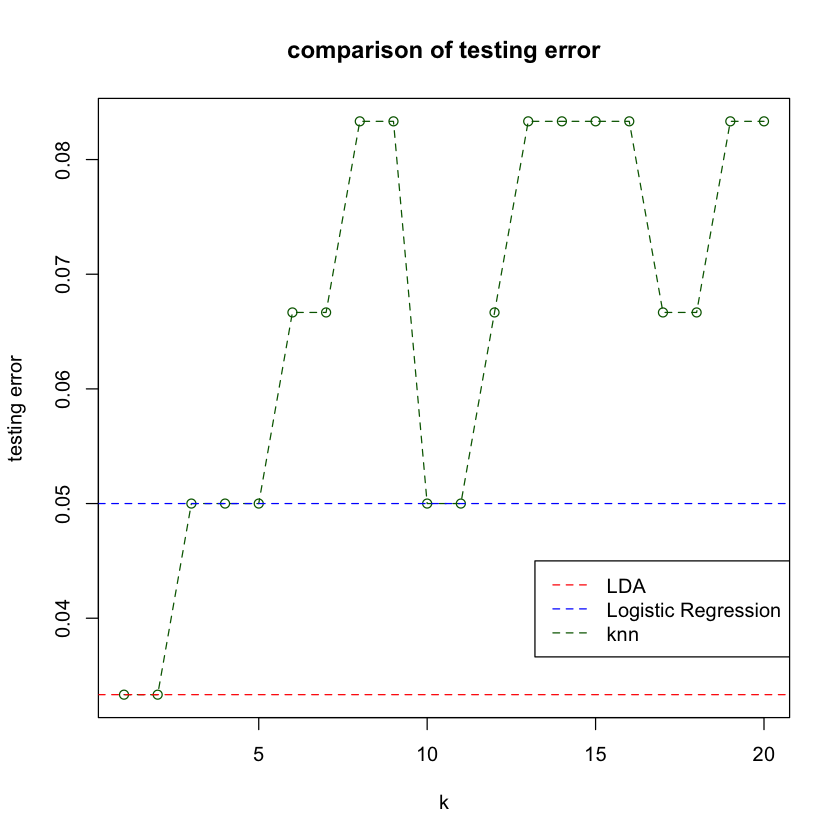

In [13]:
y.lim = c(min(c(ir.knn.error.test, ir.lr.error.test, ir.lda.error.test)), max(c(ir.knn.error.test, ir.lr.error.test, ir.lda.error.test))) #setting limits so that all graphs fit in the same plot
plot(k,ir.knn.error.test, type = 'o', lty = 2, ylim = y.lim, col = "dark green", ylab = "testing error", , main = "comparison of testing error") #plotting knn error
abline(h = ir.lr.error.test, col = "blue", lty = 2, cex = 2) #plotting logistic regression error
abline(h = ir.lda.error.test, col = "red", lty = 2, cex = 2) #plotting linear discriminant analysis error
legend(13.2, 0.045, legend = c("LDA", "Logistic Regression","knn"), col = c("red", "blue", "dark green"), lty = c(2,2,2), cex = 1)

Now let's plot the training errors for each of these.

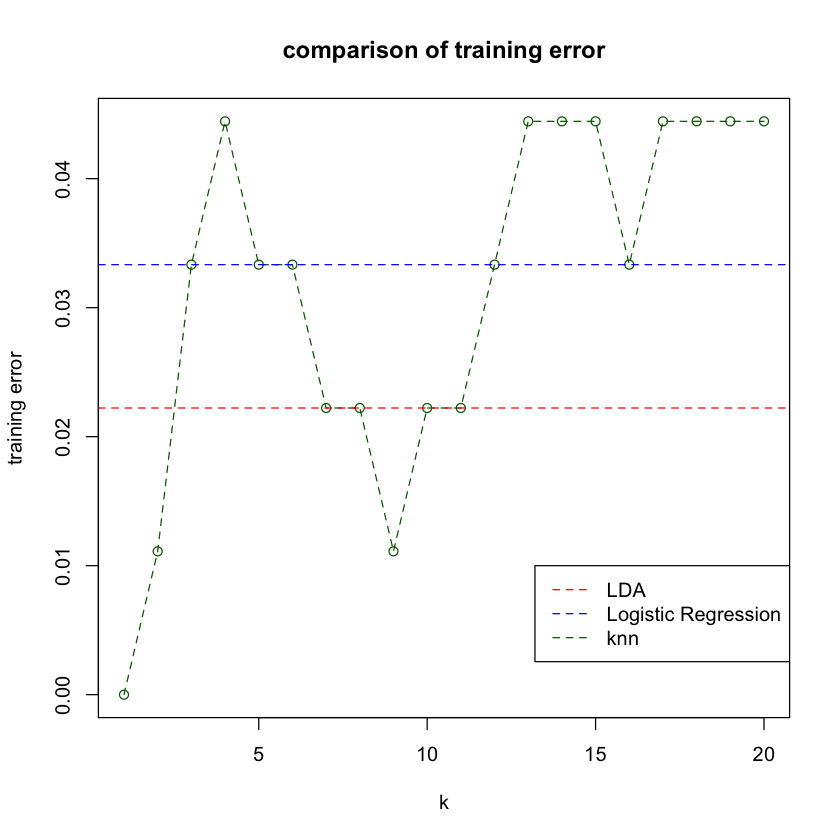

In [14]:
y.lim = c(min(c(ir.knn.error.train, ir.lr.error.train, ir.lda.error.train)), max(c(ir.knn.error.train, ir.lr.error.train, ir.lda.error.train))) #setting limits so that all graphs fit in the same plot
plot(k, ir.knn.error.train, type = 'o', lty = 2, ylim = y.lim, col = "dark green", ylab = "training error", main = "comparison of training error") #plotting knn error
abline(h = ir.lr.error.train, col = "blue", lty = 2, cex = 2) #plotting logistic regression error
abline(h = ir.lda.error.train, col = "red", lty = 2, cex = 2) #plotting linear discriminant analysis error
legend(13.2, 0.01, legend = c("LDA", "Logistic Regression","knn"), col = c("red", "blue", "dark green"), lty = c(2,2,2), cex = 1)

$(2)$. This is $k-$means clustering by just using the $X$ from our data.

In [15]:
ir.x = data[,c(1:4)]
ir.y = data[,5]
ir.km = kmeans(ir.x, 3, nstart = 10)$cluster
#we check all matchings for {1,2,3} with {"setosa", "versicolor", "virginica"} and find which one reduces the error
dummy = rep("a", length(ir.km))
error = c()
min_err = 2
min_err.index = c(0,0,0)
answer = c()
for (i in 1:3){
    for (j in 1:3){
        for (p in 1:3){
            if (i==j | j==p | p==i) next
            dummy[ir.km == i] = "setosa"
            dummy[ir.km == j] = "versicolor"
            dummy[ir.km == p] = "virginica"
            e = mean(dummy != ir.y)
            error = append(error, e)
            if(e < min_err){
                min_err = e
                min_err.index = c(i,j,p)
                answer = dummy
            }
        }
    }
}
cat("Error:",min_err*100,"%\n\n")
d = cbind(data[which(answer != ir.y),],answer[which(answer != ir.y)])
colnames(d) = c("Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width", "Actual", "Predicted")
cat("The incorrect predictions:\n")
print(d)

Error: 10.66667 %

The incorrect predictions:
    Sepal.Length Sepal.Width Petal.Length Petal.Width     Actual  Predicted
53           6.9         3.1          4.9         1.5 versicolor  virginica
78           6.7         3.0          5.0         1.7 versicolor  virginica
102          5.8         2.7          5.1         1.9  virginica versicolor
107          4.9         2.5          4.5         1.7  virginica versicolor
114          5.7         2.5          5.0         2.0  virginica versicolor
115          5.8         2.8          5.1         2.4  virginica versicolor
120          6.0         2.2          5.0         1.5  virginica versicolor
122          5.6         2.8          4.9         2.0  virginica versicolor
124          6.3         2.7          4.9         1.8  virginica versicolor
127          6.2         2.8          4.8         1.8  virginica versicolor
128          6.1         3.0          4.9         1.8  virginica versicolor
134          6.3         2.8          5.1 

$(3)$ For this part we don't know the number of clusters and want to find it. 

One method is to do $k-$means clustering for the data for different values of $k$ and look at the total within sum of squares error. This total error will obviously decrease with increasing value of $k$, but it 'stabilizes' once the correct number of clusters is reached. We plot the graph of the total error vs. $k$. There will be a turning point, which denotes the big change in slope and that is the number of clusters we are looking for. Here's is the graph for the \texttt{iris} data.

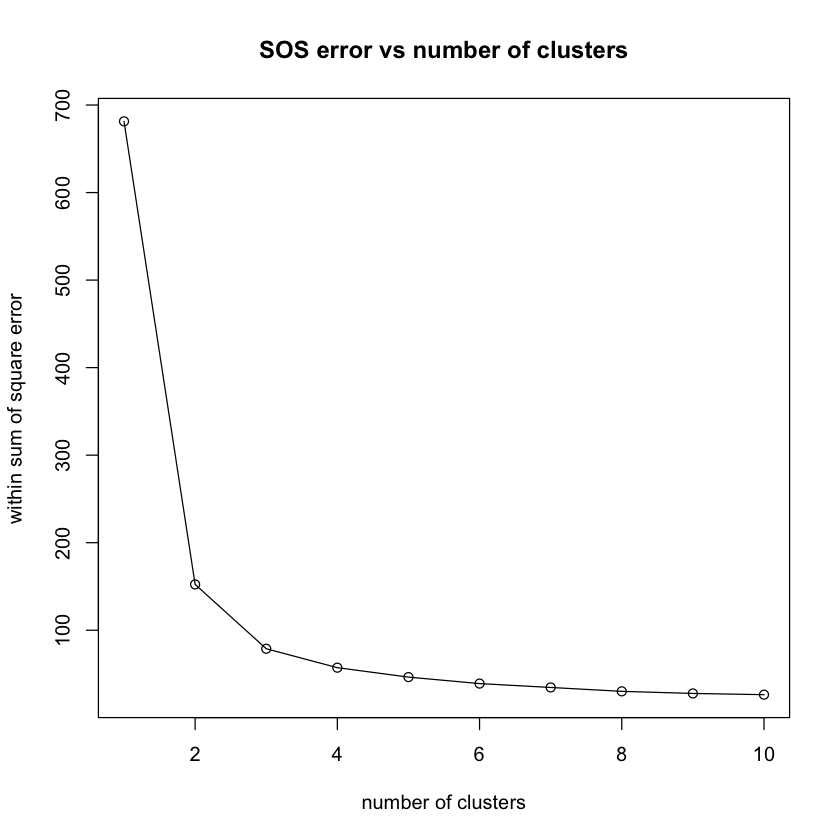

In [16]:
k = c(1:10)
km = c()
for (i in k){
    km = append(km, kmeans(ir.x, i, nstart = 25)$tot.withinss)
}
plot(km ~ k, type="o", ylab = "within sum of square error", xlab = "number of clusters", main = "SOS error vs number of clusters")

From this graph, we see that the big change in slope happens at $k=2$ or $k=3$. That is, the graph starts 'flattening' from $k=2$ or $k=3$.

We propose another method which comes from looking at the density of points in the data distribution to find centers, and then assigning each point to one of these clusters. We detect clusters by looking at regions which have higher density of points. So we estimate an average density for each point by assigning unit mass to each point averaging over many balls of varying radii. Then we visually detect points which are potentially centers of clusters. I will implement the density calculation and visually find the potential centers of the clusters. And then find the clusters.

In [17]:
D = as.matrix(dist(ir.x))
rad = c(seq(from = 0.1, to = 3, by = 0.01)) #set of radii to pick from
avg_density = function(p){
    tot_d = 0.0
    for(r in rad){
        tot_d = tot_d + length(which(D[p,] <= r))/(r^4)
    }
    return(tot_d)
}
density = c() #array to store densities
for(i in 1:nrow(ir.x)){
    density = append(density, avg_density(i))
}
density = density/max(density) #normalizing
dat = data.frame("point"=c(1:150),density) 
sorted_dat = dat[order(dat$density, decreasing = TRUE), ] #making data frame to sort points with highest densities

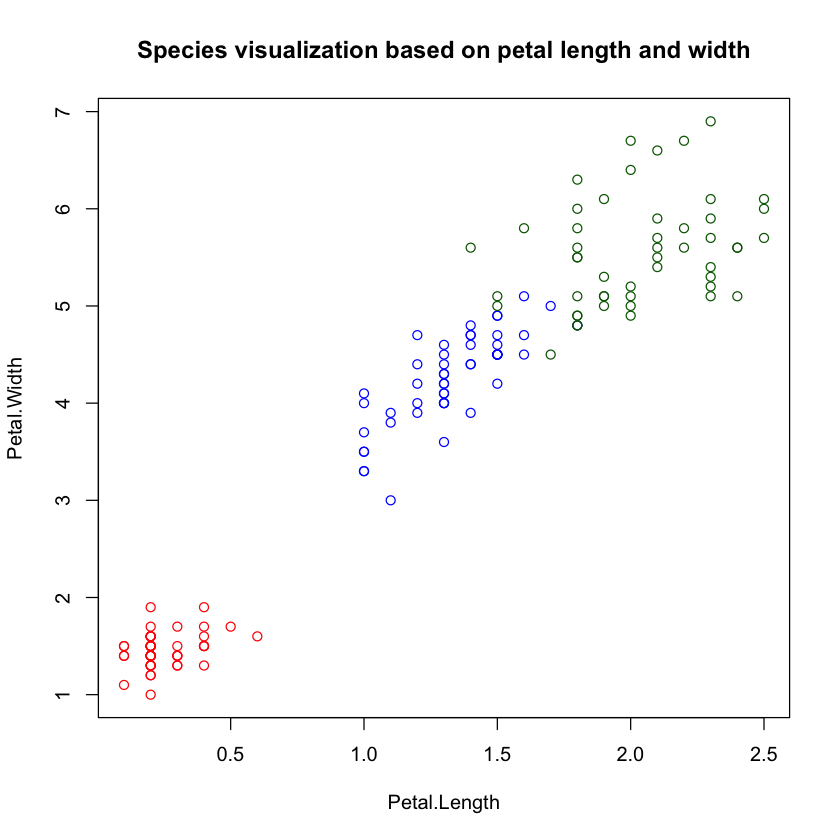

In [18]:
plot(data[,3] ~ data[,4], data = iris, col = "white", xlab = "Petal.Length", ylab = "Petal.Width", main = "Species visualization based on petal length and width")
for(i in c(1:50)){
    points(data[i,4],data[i,3], col = "red")
}
for(i in c(51:100)){
    points(data[i,4],data[i,3], col = "blue")
}
for(i in c(101:150)){
    points(data[i,4],data[i,3], col = "dark green")
}

1 : ( 1.4 , 0.2 )
2 : ( 1.4 , 0.2 )
4 : ( 1.5 , 0.2 )
5 : ( 1.4 , 0.2 )
8 : ( 1.5 , 0.2 )
10 : ( 1.5 , 0.1 )
11 : ( 1.5 , 0.2 )
13 : ( 1.4 , 0.1 )
18 : ( 1.4 , 0.3 )
20 : ( 1.5 , 0.3 )
28 : ( 1.5 , 0.2 )
29 : ( 1.4 , 0.2 )
30 : ( 1.6 , 0.2 )
31 : ( 1.6 , 0.2 )
35 : ( 1.5 , 0.2 )
40 : ( 1.5 , 0.2 )
41 : ( 1.3 , 0.3 )
48 : ( 1.4 , 0.2 )
49 : ( 1.5 , 0.2 )
50 : ( 1.4 , 0.2 )
97 : ( 4.2 , 1.3 )
102 : ( 5.1 , 1.9 )
143 : ( 5.1 , 1.9 )


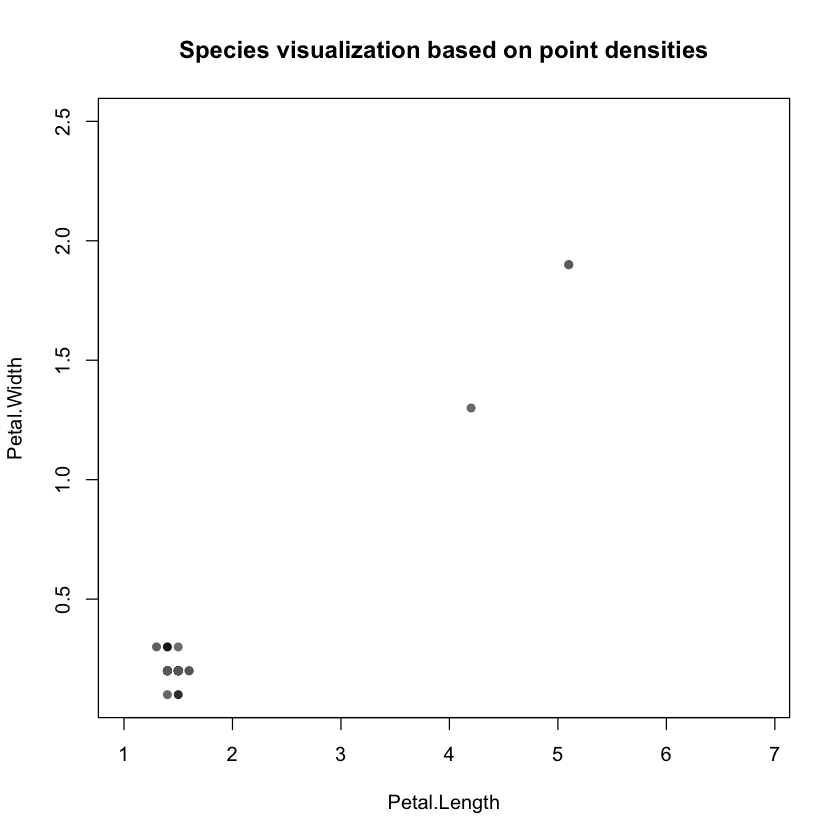

In [19]:
plot(Petal.Width ~ Petal.Length, data = data, col = "white", main = "Species visualization based on point densities")
for(i in c(1:150)){
    if(density[i] < 0.5) next
    cat(i,": (", data[i,3], ",", data[i,4], ")\n")
    points(data[i,3], data[i,4], col = rgb(1-density[i],1-density[i],1-density[i]), pch = 16)
}

From this visualization, I will declare my centers to be $18, 97, 102$ (because the lower left corner looks like one cluster visually). Next, for a point $\pmb p_i$, we say it belongs to the class of $\displaystyle j_0 = \text{argmin}_{j\in \{18,97,102\}} \left|\left|\pmb p_i-\pmb p_j\right|\right|_2$.

In [20]:
#function to find the abovementioned argmin
minimizer = function(p){
    ans = 0
    min_so_far = 10
    candidate = c(18,97,102)
    for(j in candidate){
        dist = sum((ir.x[p,]-ir.x[j,])^2)
        if(dist<min_so_far){
            min_so_far = dist
            ans = j
        }
    }
    return(ans)
}

prediction = c() #empty array to hold the predictions
for(i in c(1:150)){
    prediction = append(prediction, ir.y[minimizer(i)]) #assigning the same class as the minimizer of the point
}
cat("training error:", mean(prediction!=ir.y)*100, "%\n") #error rate

training error: 6 %


$(4)$ We compare $k-$means clustering with Hierarchical Clustering, assuming that we know that the number of clusters is $3$.

In [21]:
ir.hc = hclust(dist(ir.x))
predict.ir.hc = cutree(ir.hc, k = 3)
#we check all matchings for {1,2,3} with {"setosa", "versicolor", "virginica"} and find which one reduces the error
dummy = rep("a", length(predict.ir.hc))
error = c()
min_err = 2
min_err.index = c(0,0,0)
answer = c()
for (i in 1:3){
    for (j in 1:3){
        for (p in 1:3){
            if (i==j | j==p | p==i) next 
            dummy[predict.ir.hc == i] = "setosa"
            dummy[predict.ir.hc == j] = "versicolor"
            dummy[predict.ir.hc == p] = "virginica"
            e = mean(dummy != ir.y)
            error = append(error, e)
            if(e < min_err){
                min_err = e
                min_err.index = c(i,j,p)
                answer = dummy
            }
        }
    }
}
cat("Error:",min_err*100,"%\n\n")
d = cbind(data[which(answer != ir.y),],answer[which(answer != ir.y)])
colnames(d) = c("Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width", "Actual", "Predicted")
cat("The incorrect predictions:\n")
print(d)

Error: 16 %

The incorrect predictions:
    Sepal.Length Sepal.Width Petal.Length Petal.Width     Actual  Predicted
51           7.0         3.2          4.7         1.4 versicolor  virginica
52           6.4         3.2          4.5         1.5 versicolor  virginica
53           6.9         3.1          4.9         1.5 versicolor  virginica
55           6.5         2.8          4.6         1.5 versicolor  virginica
57           6.3         3.3          4.7         1.6 versicolor  virginica
59           6.6         2.9          4.6         1.3 versicolor  virginica
64           6.1         2.9          4.7         1.4 versicolor  virginica
66           6.7         3.1          4.4         1.4 versicolor  virginica
69           6.2         2.2          4.5         1.5 versicolor  virginica
71           5.9         3.2          4.8         1.8 versicolor  virginica
73           6.3         2.5          4.9         1.5 versicolor  virginica
74           6.1         2.8          4.7       

\newpage
# Problem
Analyze the wage data as a function of age by the following methods (you can use existing packages in
any programing language you are using).
\begin{enumerate}
\item Polynomial regression with degree $4$.
\item A cubic spline with knots at $25$, $40$, and $60$.
\item Smoothing spline with the smoothness level specified by cross-validation.
\item Comment on the differences of the three models and draw a conclusion.
\end{enumerate}

\subsection*{Solution}

$(1)$ First let's load the data and initialize our predictor \texttt{age} and the response \texttt{wage}.

In [22]:
data = as.data.frame(read.table("./wage.txt", header = T)) #load data
wage.y = data$wage #response
wage.x = data$age #predictor

Now we fit the polynomial regression model for degree $4$.

In [23]:
wage.pr = lm(wage ~ poly(age, 4), data)
summary(wage.pr)


Call:
lm(formula = wage ~ poly(age, 4), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.707 -24.626  -4.993  15.217 203.693 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    111.7036     0.7287 153.283  < 2e-16 ***
poly(age, 4)1  447.0679    39.9148  11.201  < 2e-16 ***
poly(age, 4)2 -478.3158    39.9148 -11.983  < 2e-16 ***
poly(age, 4)3  125.5217    39.9148   3.145  0.00168 ** 
poly(age, 4)4  -77.9112    39.9148  -1.952  0.05104 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.91 on 2995 degrees of freedom
Multiple R-squared:  0.08626,	Adjusted R-squared:  0.08504 
F-statistic: 70.69 on 4 and 2995 DF,  p-value: < 2.2e-16


Next, we'll plot the cubic polynomial that we got from the regression.

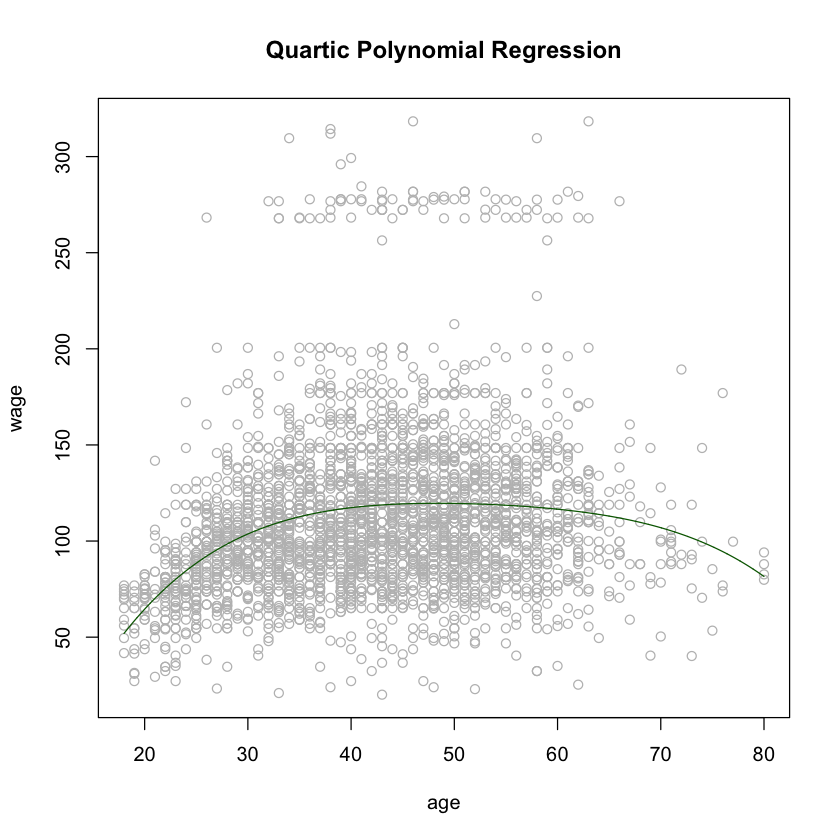

In [24]:
#getting the points to input into the polynomial function, to draw the graph of polynomial

#these are the 'test' points
x.test = seq(from = min(wage.x), to = max(wage.x), by = 0.01)

#find response for these 'test' points
y.poly.test = predict(wage.pr, list(age = x.test))

#plot the graph now
plot(wage.y ~ wage.x,  xlab = "age", ylab = "wage", col = "grey", main = "Quartic Polynomial Regression")
lines(x.test, y.poly.test, col = "dark green", lwd = 1)

$(2)$ We now fit a cubic spline with knots at $25,40,60$.

In [25]:
library(splines)
wage.spline = lm(wage ~ bs(age, knots = c(25,40,60)), data = data)
summary(wage.spline)


Call:
lm(formula = wage ~ bs(age, knots = c(25, 40, 60)), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.832 -24.537  -5.049  15.209 203.207 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       60.494      9.460   6.394 1.86e-10 ***
bs(age, knots = c(25, 40, 60))1    3.980     12.538   0.317 0.750899    
bs(age, knots = c(25, 40, 60))2   44.631      9.626   4.636 3.70e-06 ***
bs(age, knots = c(25, 40, 60))3   62.839     10.755   5.843 5.69e-09 ***
bs(age, knots = c(25, 40, 60))4   55.991     10.706   5.230 1.81e-07 ***
bs(age, knots = c(25, 40, 60))5   50.688     14.402   3.520 0.000439 ***
bs(age, knots = c(25, 40, 60))6   16.606     19.126   0.868 0.385338    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 39.92 on 2993 degrees of freedom
Multiple R-squared:  0.08642,	Adjusted R-squared:  0.08459 
F-statistic: 47.19 on 6 and 2993 DF,  p-value: < 

Let's plot this now. It looks almost same as the above quartic polynomial regression.

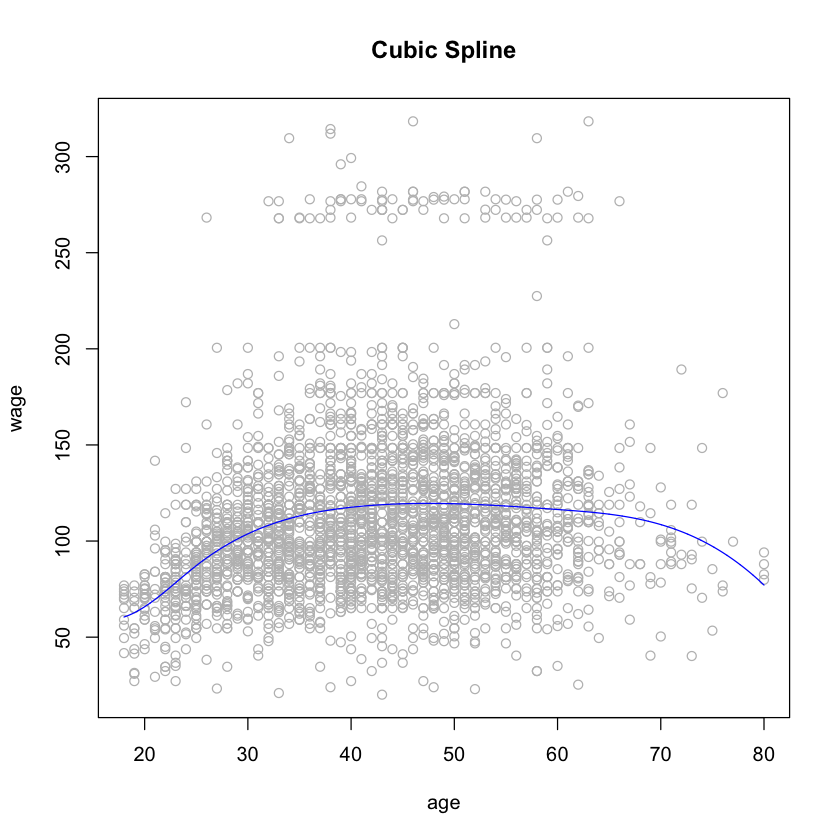

In [26]:
y.spline.test = predict(wage.spline, list(age = x.test))
plot(wage.y ~ wage.x,  xlab = "age", ylab = "wage", col = "grey", main = "Cubic Spline")
lines(x.test, y.spline.test, col = "blue", lwd = 1)

$(3)$ We fit a smoothing spline where the smoothness parameter is determined by cross-validation.

Warning message in smooth.spline(wage.x, wage.y, cv = T):
“cross-validation with non-unique 'x' values seems doubtful”


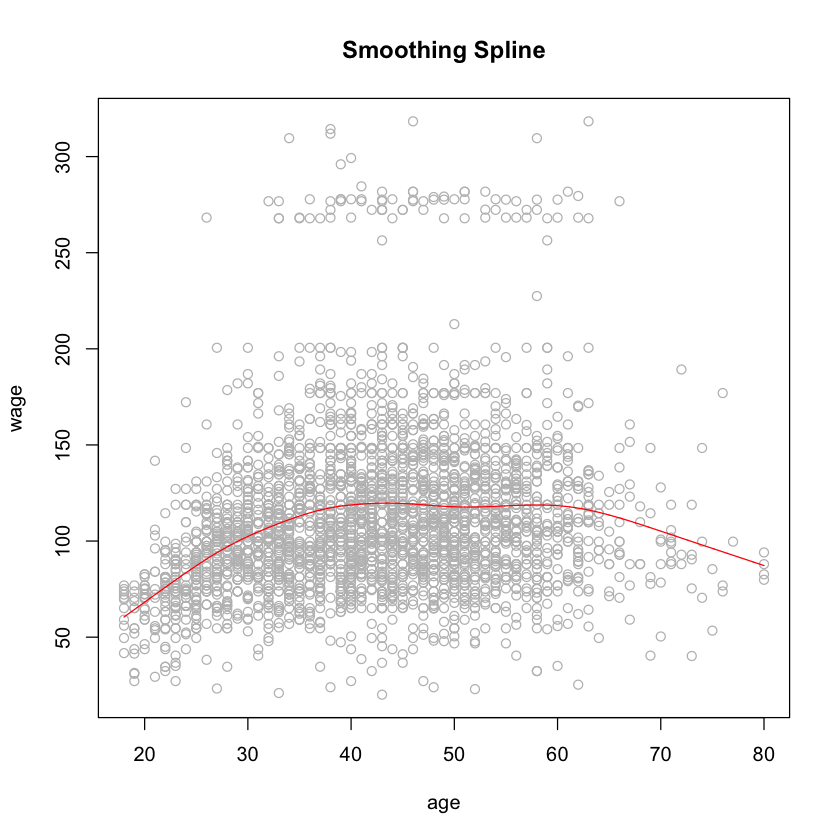

In [27]:
wage.sspline = smooth.spline(wage.x, wage.y, cv = T) #cv=T means leave-one-out cv
y.sspline.test = predict(wage.sspline, x = x.test)$y
plot(wage.y ~ wage.x,  xlab = "age", ylab = "wage", col = "grey", main = "Smoothing Spline")
lines(x.test, y.sspline.test, col = "red", lwd = 1)
#lines(x.test, y.spline.test, col = "blue", lwd = 2)
#lines(x.test, y.poly.test, col = "dark green", lwd = 2)
#wage.sspline = smooth.spline(wage.x, wage.y, cv = T) #cv=F means generalized cross-validation
#wage.sspline
#y.sspline.test = predict(wage.sspline, x = x.test)$y
#plot(wage.y ~ wage.x,  xlab = "age", ylab = "wage")
#lines(x.test, y.sspline.test, col = "blue", lwd = 2)

$(4)$ To compare the models, we'll compare their testing errors. 

Error for polynomial regression:	 1590.535 
Error for cubic spline:			 1590.259 
Error for smoothing spline:		 1587.209

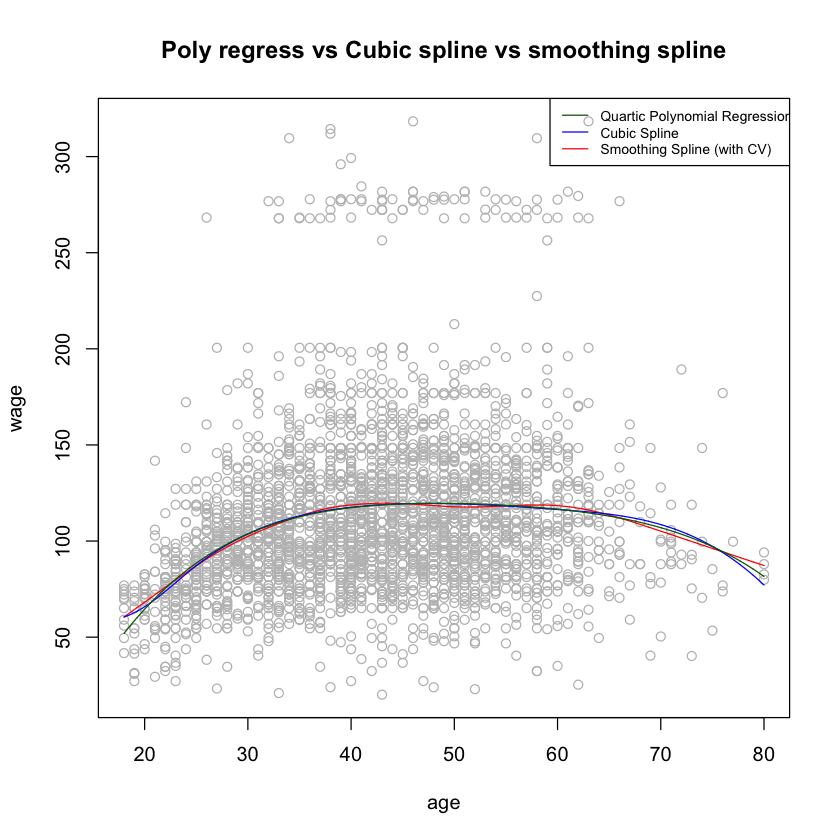

In [28]:
cat("Error for polynomial regression:\t", mean(wage.pr$residuals^2), "\n")
cat("Error for cubic spline:\t\t\t", mean(wage.spline$residuals^2), "\n")
cat("Error for smoothing spline:\t\t", mean((wage.y - predict(wage.sspline, wage.x)$y)^2))
plot(wage.y ~ wage.x,  xlab = "age", ylab = "wage", col = "grey", main = "Poly regress vs Cubic spline vs smoothing spline")
lines(x.test, y.sspline.test, col = "red", lwd = 1)
lines(x.test, y.spline.test, col = "blue", lwd = 1)
lines(x.test, y.poly.test, col = "dark green", lwd = 1)
legend("topright", legend = c("Quartic Polynomial Regression", "Cubic Spline", "Smoothing Spline (with CV)"), col = c("dark green", "blue", "red"), lty = c(1,1,1), cex = 0.7)

Polynomial regression gives a single polynomial that models the entire data set. The cubic spline fits a cubic polynomial in each sub-interval separated by the knots $25, 40, 60$ and, these cubic polynomials are connected so that we end up with a continuous smooth curve through the points. Smoothing splines have knots at each point, but regularizes (shrinks the coefficients/smooths the fit) by adding a roughness penalty term (integrated squared second derivative times a smoothing parameter/tuning parameter) to the least squares criterion. So smoothing spline gioves the best fit, although there is not a significant improvement. Based on this run, we can say that the best fit is given by smoothing spline, followed by cubic spline, though very very close to polynomial regression.